In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

## I HAVEF TO WORK ON THIS
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


## Data

In [33]:
csv_path = r"C:\Users\sofia.martinez_bluet\Downloads\bottle.csv"

# Verificar si el archivo existe en la ruta especificada
if os.path.exists(csv_path):
    # Leer el archivo CSV
    data = pd.read_csv(csv_path)
    # Mostrar las primeras filas del DataFrame para verificar
    print(data.head())
else:
    print(f"El archivo {csv_path} no se encuentra en la ruta especificada.")

C:\Users\sofia.martinez_bluet\AppData\Local\Temp\ipykernel_3692\3015002431.py:5: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_path)


   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

In [34]:
data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [38]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
data_df = data[['T_degC','Salnty']]
# And called again
data_df.columns = ['Temperature', 'Salinity']

bottle_df = data_df[:][:500]      # lets take limit for speed regression calculating
bottle_df.head()

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


### Preprocessing

In [41]:
# see how many null values we have
bottle_df.isnull().sum()


Temperature    0
Salinity       0
dtype: int64

In [40]:

# Drop NaN or missing input numbers

bottle_df.fillna(method='ffill', inplace=True)
#bottle_df.isnull().sum()
# Features chose

X = np.array(bottle_df['Salinity']).reshape(-1, 1)
y = np.array(bottle_df['Temperature']).reshape(-1, 1)
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()          # create  DecisionTreeReg with sklearn
dt_reg.fit(X_train,y_train)

dt_predict = dt_reg.predict(X_test)
#dt_predict.mean()

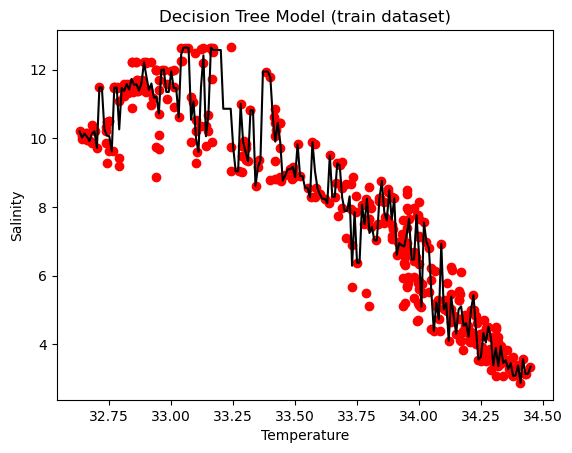

In [53]:
## SCATTER PLOT
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="black")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model (train dataset)")
plt.show()

In [50]:
####### MEASURES ######

from tabulate import tabulate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, dt_predict)
mse = mean_squared_error(y_test, dt_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_predict)

# Create a table
table = [["Mean Absolute Error (MAE)", mae],
         ["Mean Squared Error (MSE)", mse],
         ["Root Mean Squared Error (RMSE)", rmse],
         ["Coefficient of Determination (R²)", r2]]

# Print the table
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════╤══════════╕
│ Metric                            │    Value │
╞═══════════════════════════════════╪══════════╡
│ Mean Absolute Error (MAE)         │ 0.904668 │
├───────────────────────────────────┼──────────┤
│ Mean Squared Error (MSE)          │ 1.44205  │
├───────────────────────────────────┼──────────┤
│ Root Mean Squared Error (RMSE)    │ 1.20085  │
├───────────────────────────────────┼──────────┤
│ Coefficient of Determination (R²) │ 0.825582 │
╘═══════════════════════════════════╧══════════╛
